In [1]:
%matplotlib inline
import matplotlib
import matplotlib.pyplot as plt

import nest
import numpy as np

In [2]:
def plot2neurons():
    multimeter_A_readout = nest.GetStatus(multimeter_A)[0]
    V_A = multimeter_A_readout["events"]["V_m"]
    t_A = multimeter_A_readout["events"]["times"]

    multimeter_B_readout = nest.GetStatus(multimeter_B)[0]
    V_B = multimeter_B_readout["events"]["V_m"]
    t_B = multimeter_B_readout["events"]["times"]
    
    spikedetector_A_readout = nest.GetStatus(spikedetector_A, keys="events")[0]
    event_A = spikedetector_A_readout["senders"]
    te_A = spikedetector_A_readout["times"]

    spikedetector_B_readout = nest.GetStatus(spikedetector_B, keys="events")[0]
    event_B = spikedetector_B_readout["senders"]
    te_B = spikedetector_B_readout["times"]        

    plt.rcParams['figure.dpi'] = 300
    fig, ax = plt.subplots(2, 1, sharex=True, sharey=False)    
    
    ax[0].set_ylabel('V (mV)')
    
    ax[0].plot(t_A, V_A, color="tab:blue", label="A")
    ax[0].plot(t_B, V_B, color="tab:orange", label="B")
    ax[0].legend()
    
    ax[1].set_ylim(0,5)
    ax[1].set_yticks([1,4])
    ax[1].set_yticklabels(["A","B"])
    ax[1].set_xlabel('time (ms)')
    ax[1].set_ylabel('Spike times')

    ax[1].plot(te_A, event_A, ".", color="tab:blue")
    ax[1].plot(te_B, event_B, ".", color="tab:orange")

    plt.show()

In [3]:
nest.ResetKernel()

neuron_A = nest.Create("iaf_psc_delta")
nest.SetStatus(neuron_A, {"I_e": 376.0})

multimeter_A = nest.Create("multimeter")
nest.SetStatus(multimeter_A, {"withtime": True, "record_from":["V_m"], "interval": 0.1})

spikedetector_A = nest.Create("spike_detector", params={"withgid": True, "withtime": True})

nest.Connect(multimeter_A, neuron_A)
nest.Connect(neuron_A, spikedetector_A)

In [4]:
nest.Simulate(300.0)

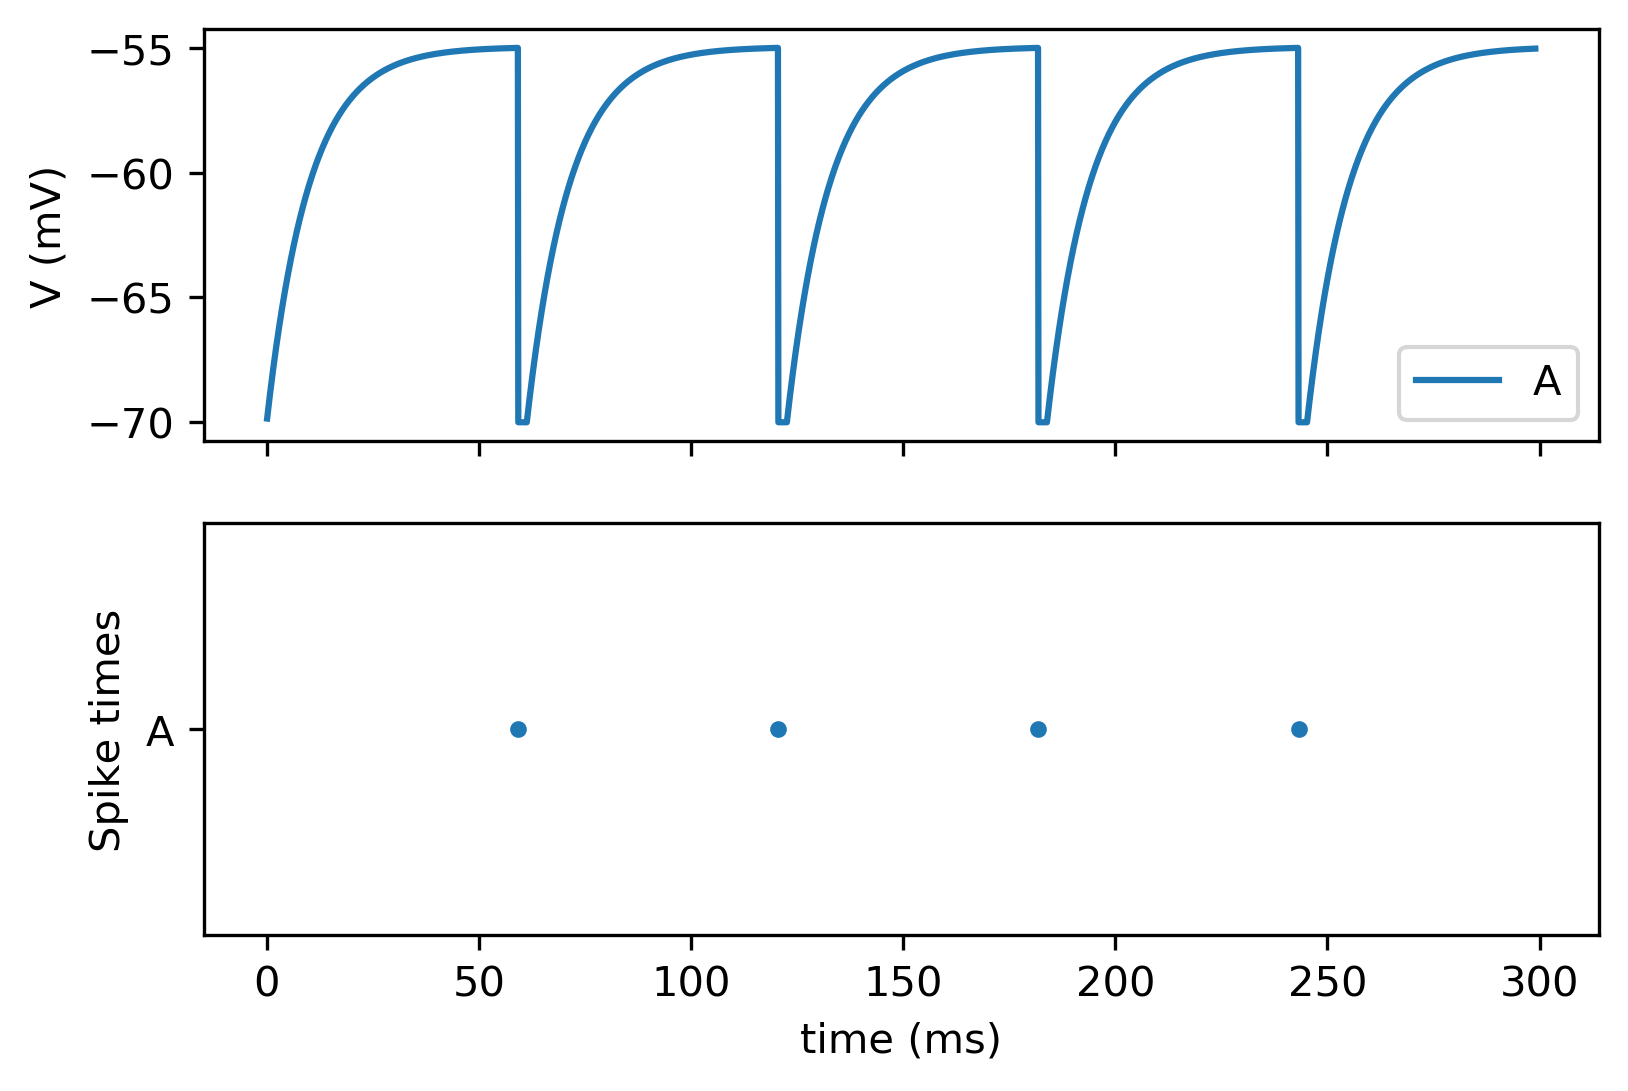

In [5]:
plt.rcParams['figure.dpi'] = 300
fig, ax = plt.subplots(2, 1, sharex=True, sharey=False)

multimeter_A_readout = nest.GetStatus(multimeter_A)[0]
V_A = multimeter_A_readout["events"]["V_m"]
t_A = multimeter_A_readout["events"]["times"]

spikedetector_A_readout = nest.GetStatus(spikedetector_A, keys="events")[0]
event_A = spikedetector_A_readout["senders"]
te_A = spikedetector_A_readout["times"]

ax[0].set_ylabel('V (mV)')

ax[0].plot(t_A, V_A, color="tab:blue", label="A")
ax[0].legend()   

ax[1].set_xlabel('time (ms)')
ax[1].set_ylabel('Spike times')
ax[1].plot(te_A, event_A, ".")

ax[1].set_yticks([1])
ax[1].set_yticklabels(["A"])

plt.show()

In [6]:
nest.ResetKernel()

neuron_A = nest.Create("iaf_psc_delta")
nest.SetStatus(neuron_A, {"I_e": 376.0})

multimeter_A = nest.Create("multimeter")
nest.SetStatus(multimeter_A, {"withtime": True, "record_from":["V_m"], "interval": 0.1})

spikedetector_A = nest.Create("spike_detector", params={"withgid": True, "withtime": True})

nest.Connect(multimeter_A, neuron_A)
nest.Connect(neuron_A, spikedetector_A)

In [7]:
neuron_B = nest.Create("iaf_psc_delta")
nest.SetStatus(neuron_B, {"I_e": 0.})

multimeter_B = nest.Create("multimeter")
nest.SetStatus(multimeter_B, {"withtime": True, "record_from":["V_m"], "interval": 0.1})

spikedetector_B = nest.Create("spike_detector", params={"withgid": True, "withtime": True})

nest.Connect(multimeter_B, neuron_B)
nest.Connect(neuron_B, spikedetector_B)

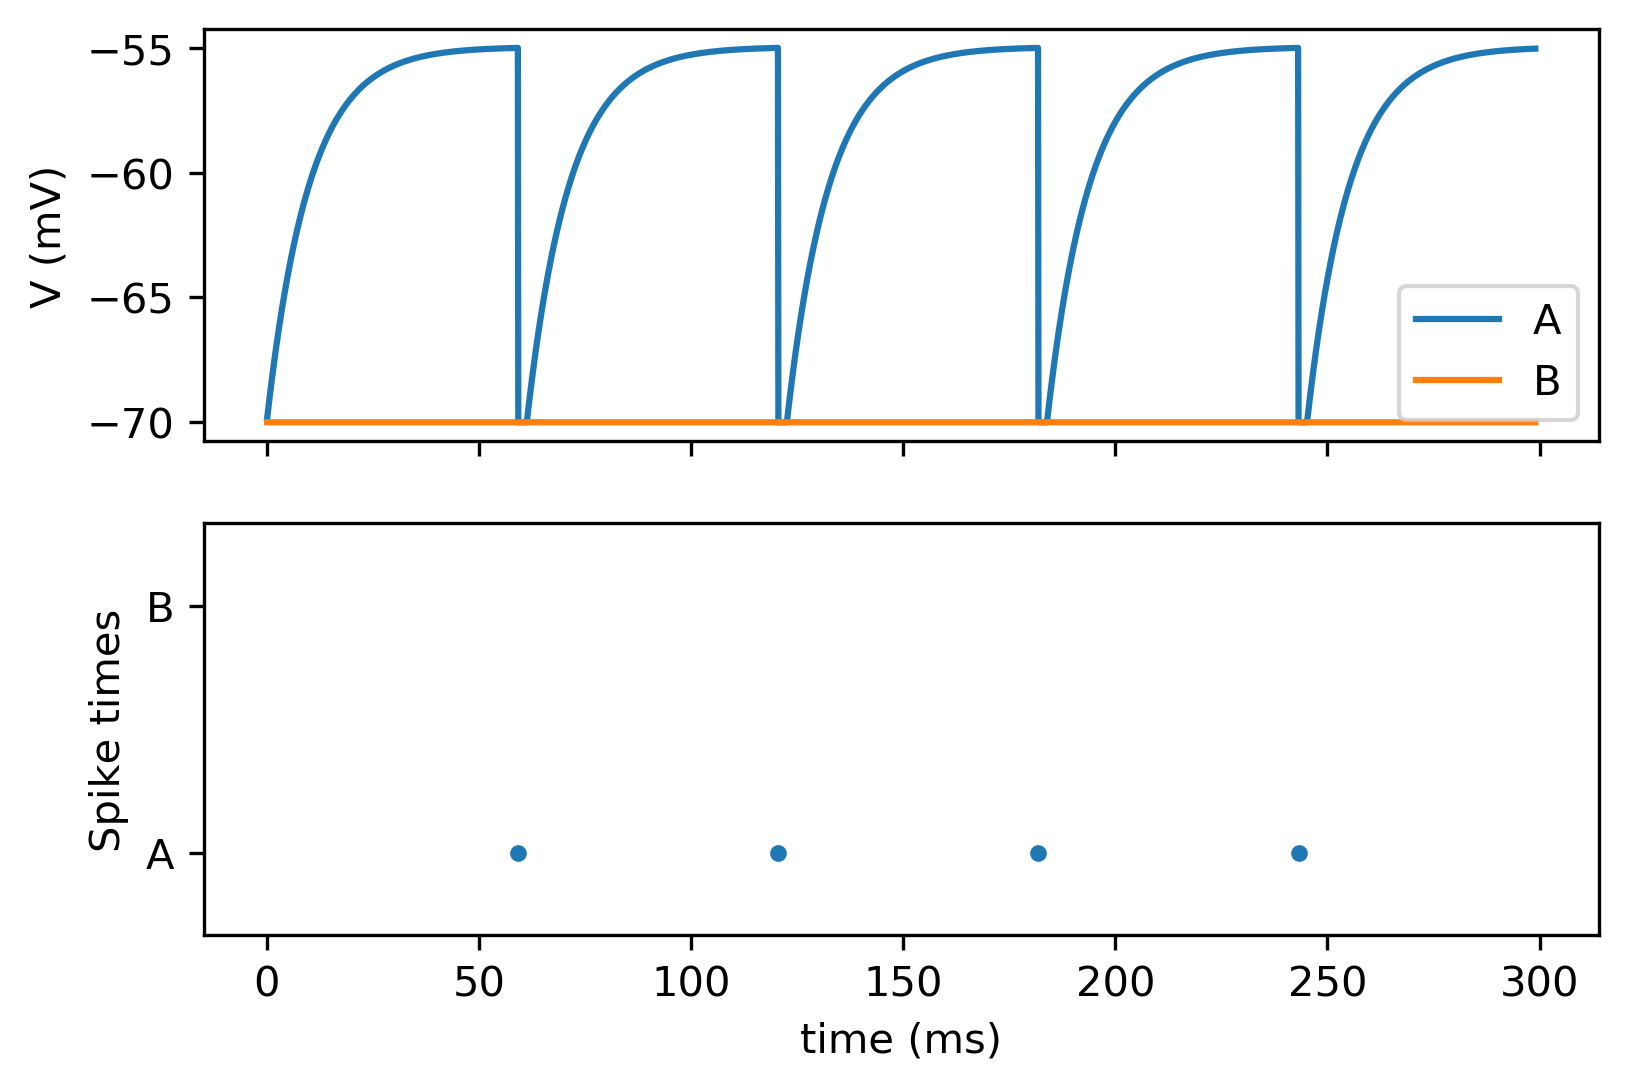

In [8]:
nest.Simulate(300.0)

plot2neurons()

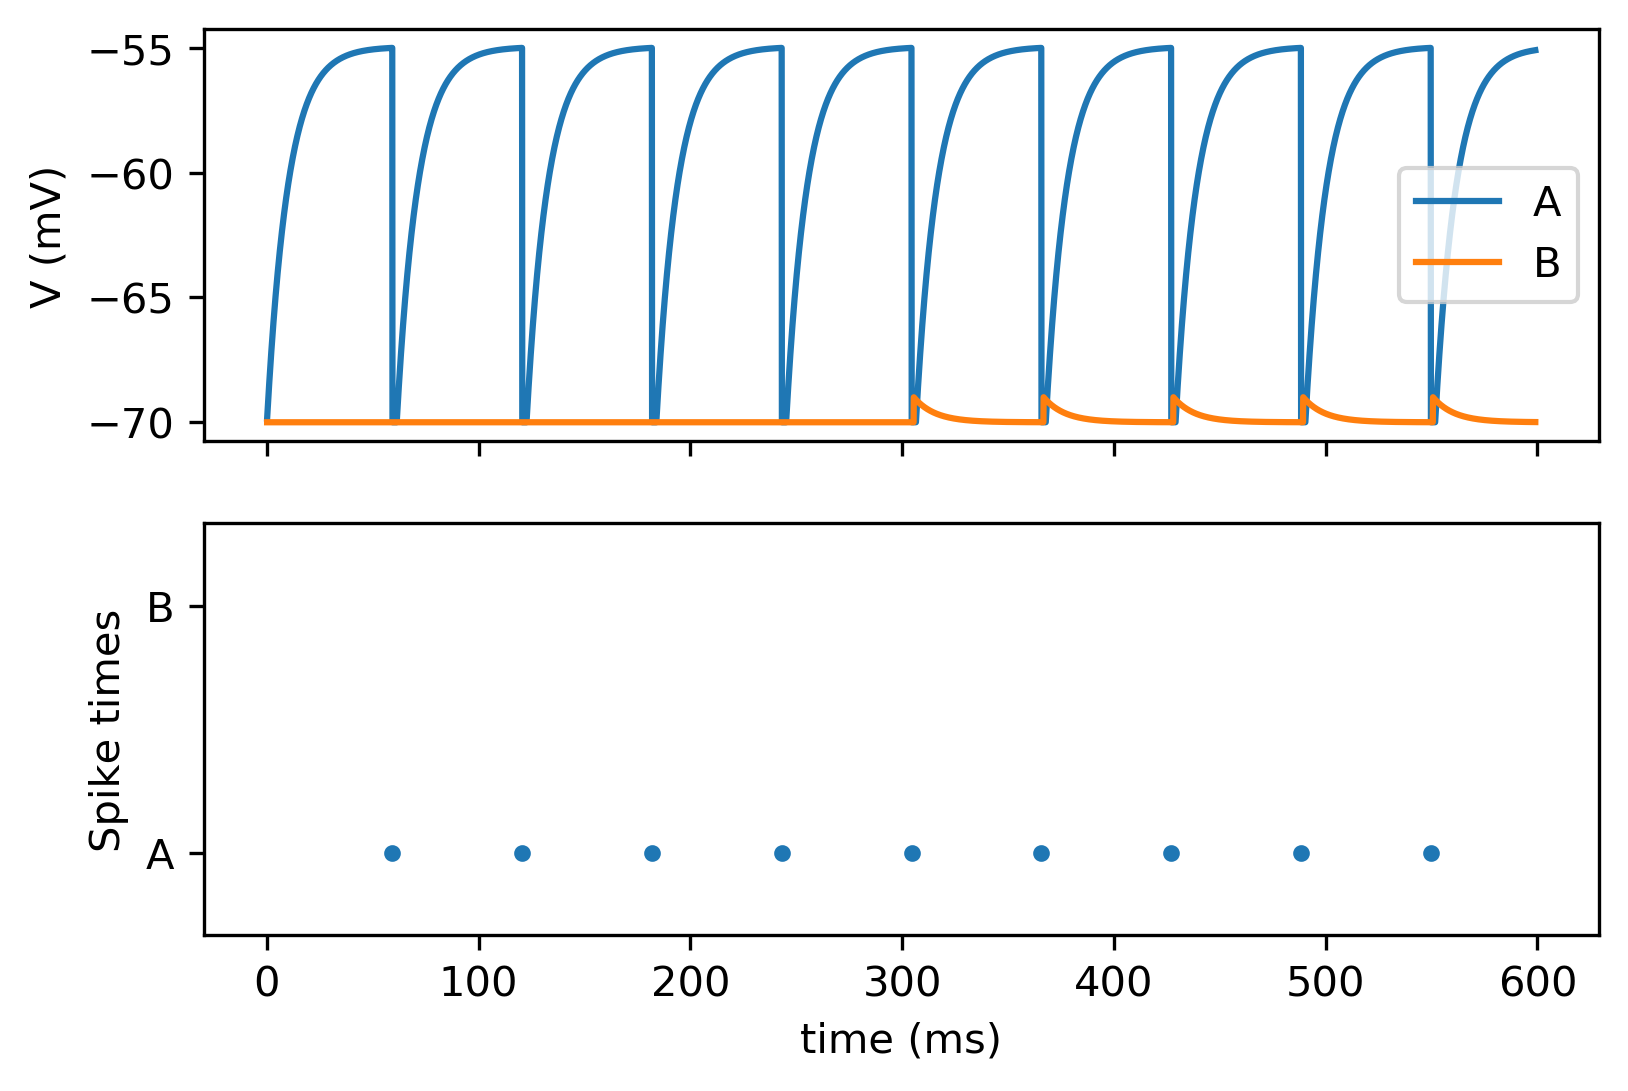

In [9]:
nest.Connect(neuron_A, neuron_B)

nest.Simulate(300.0)
plot2neurons()

In [10]:
conn = nest.GetConnections(neuron_A, neuron_B)
weight = nest.GetStatus(conn, "weight")

print(weight)

(1.0,)


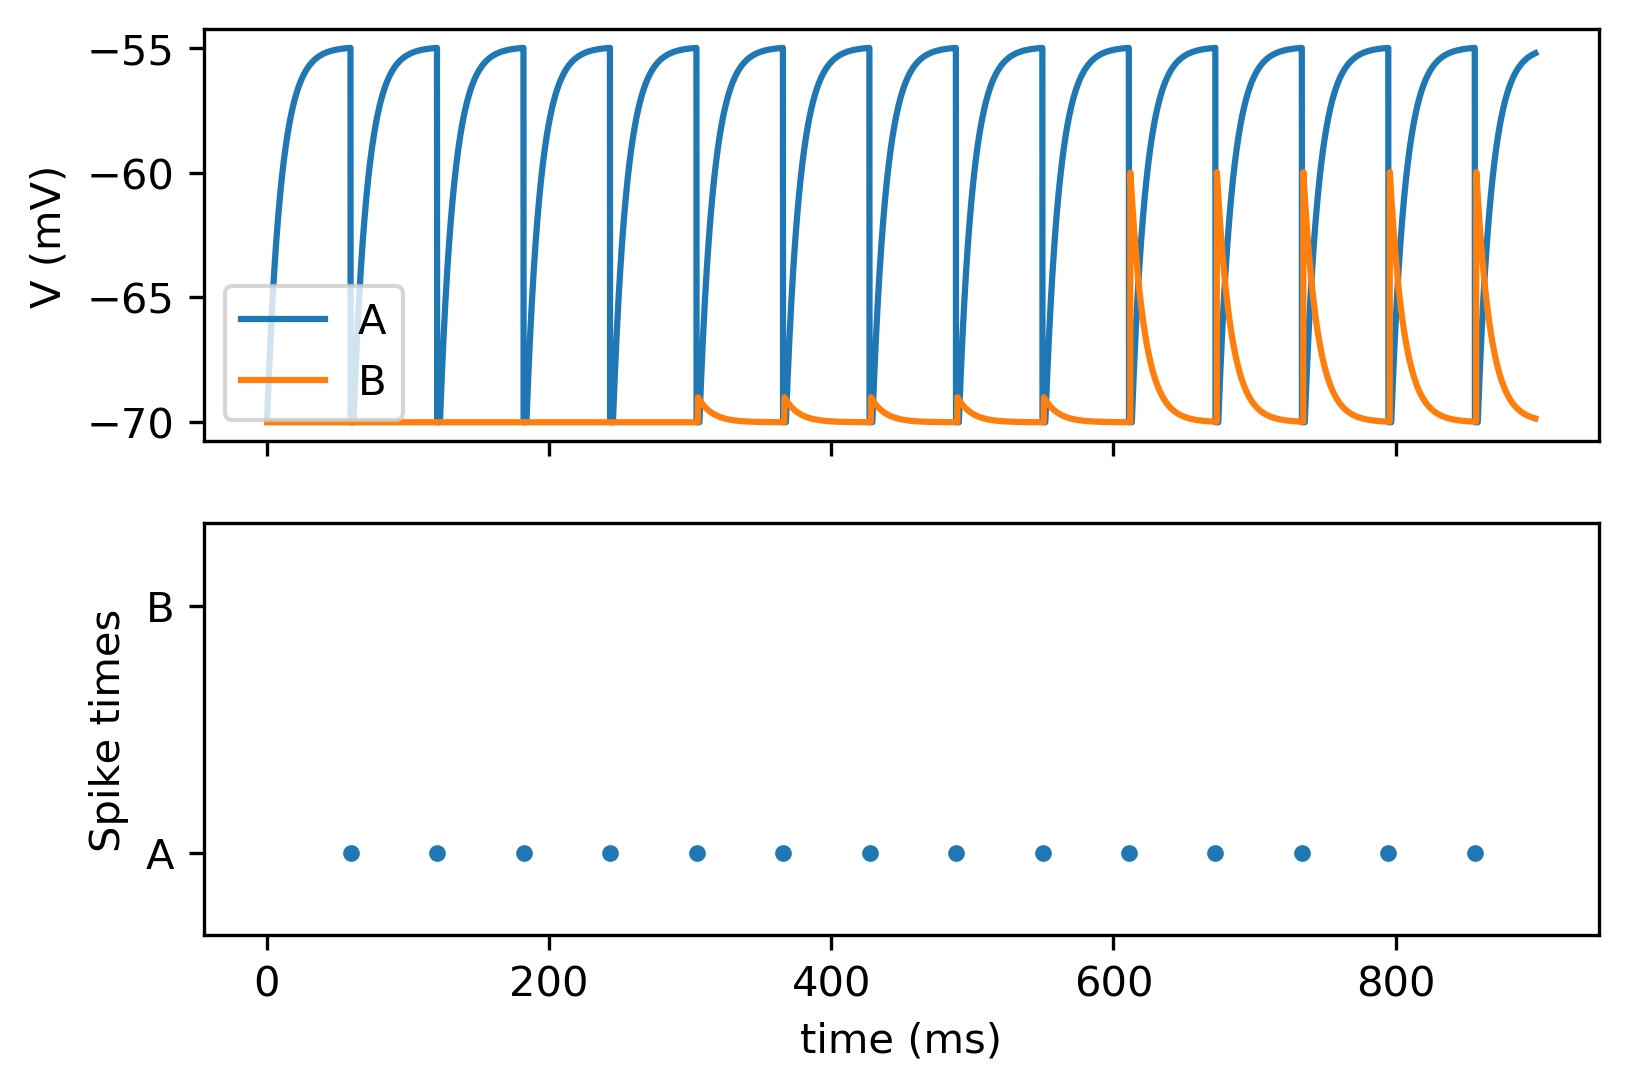

In [11]:
nest.SetStatus(conn, {"weight": 10.})
nest.Simulate(300.0)

plot2neurons()

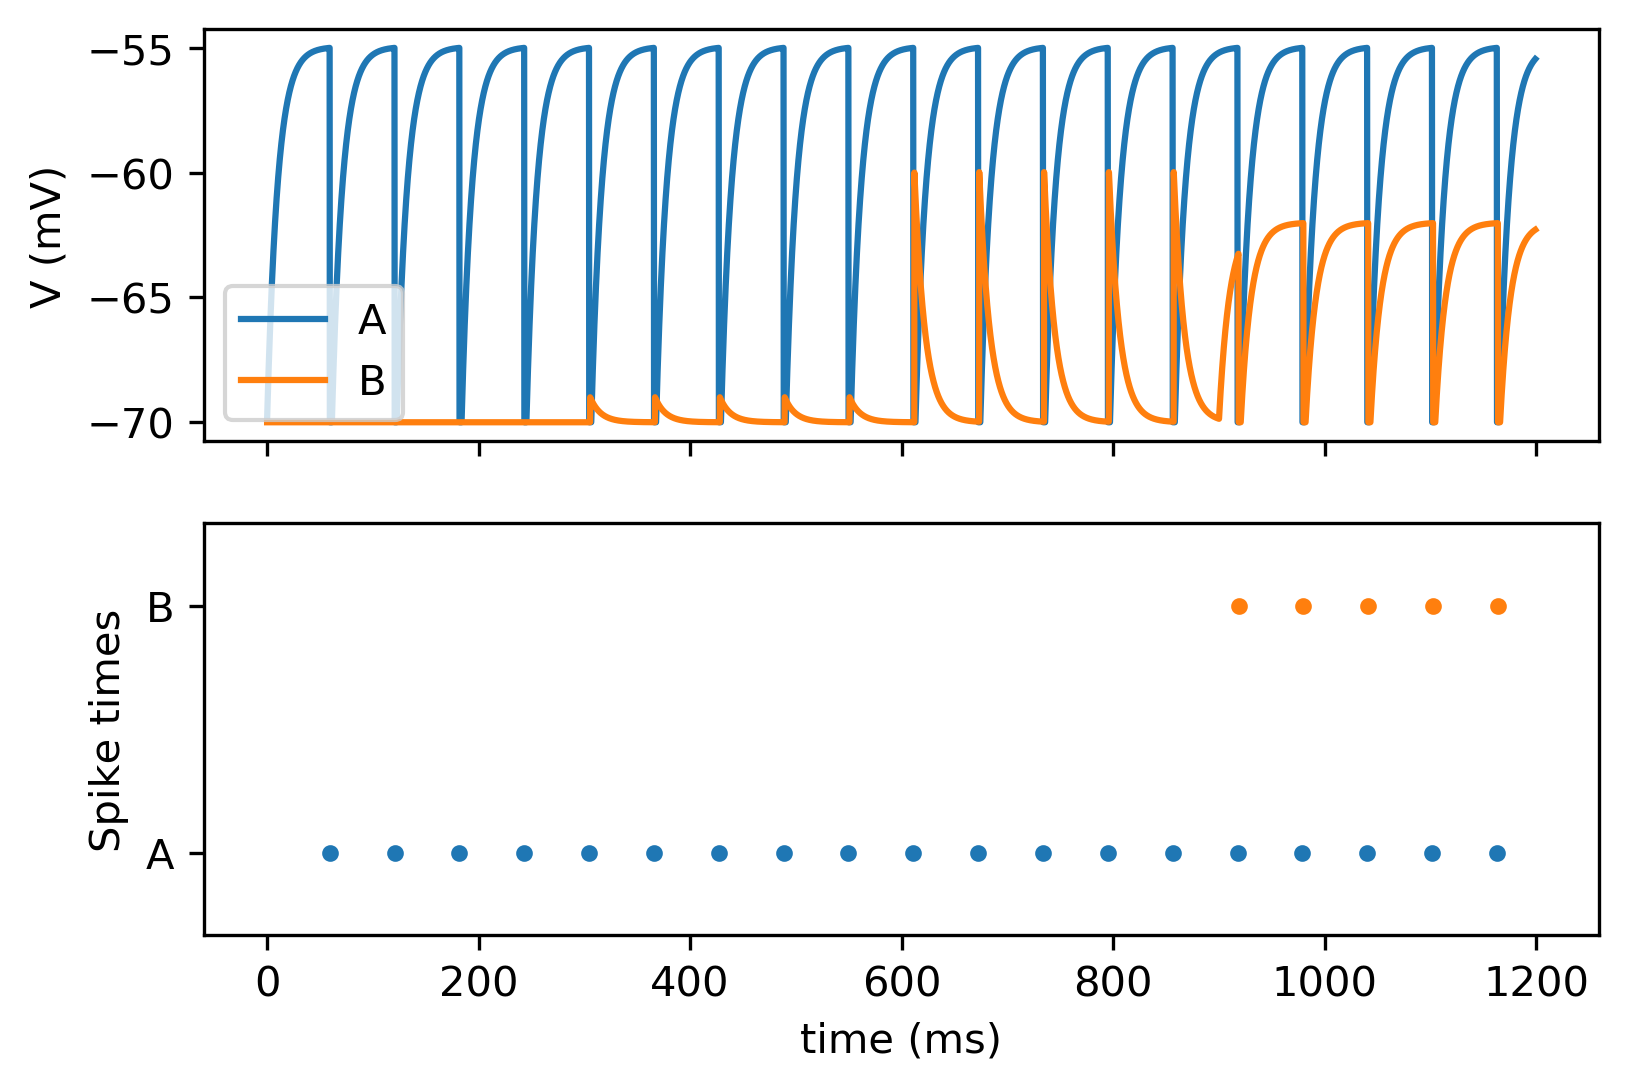

In [12]:
nest.SetStatus(neuron_B, {"I_e": 200.0})
nest.Simulate(300.0)

plot2neurons()

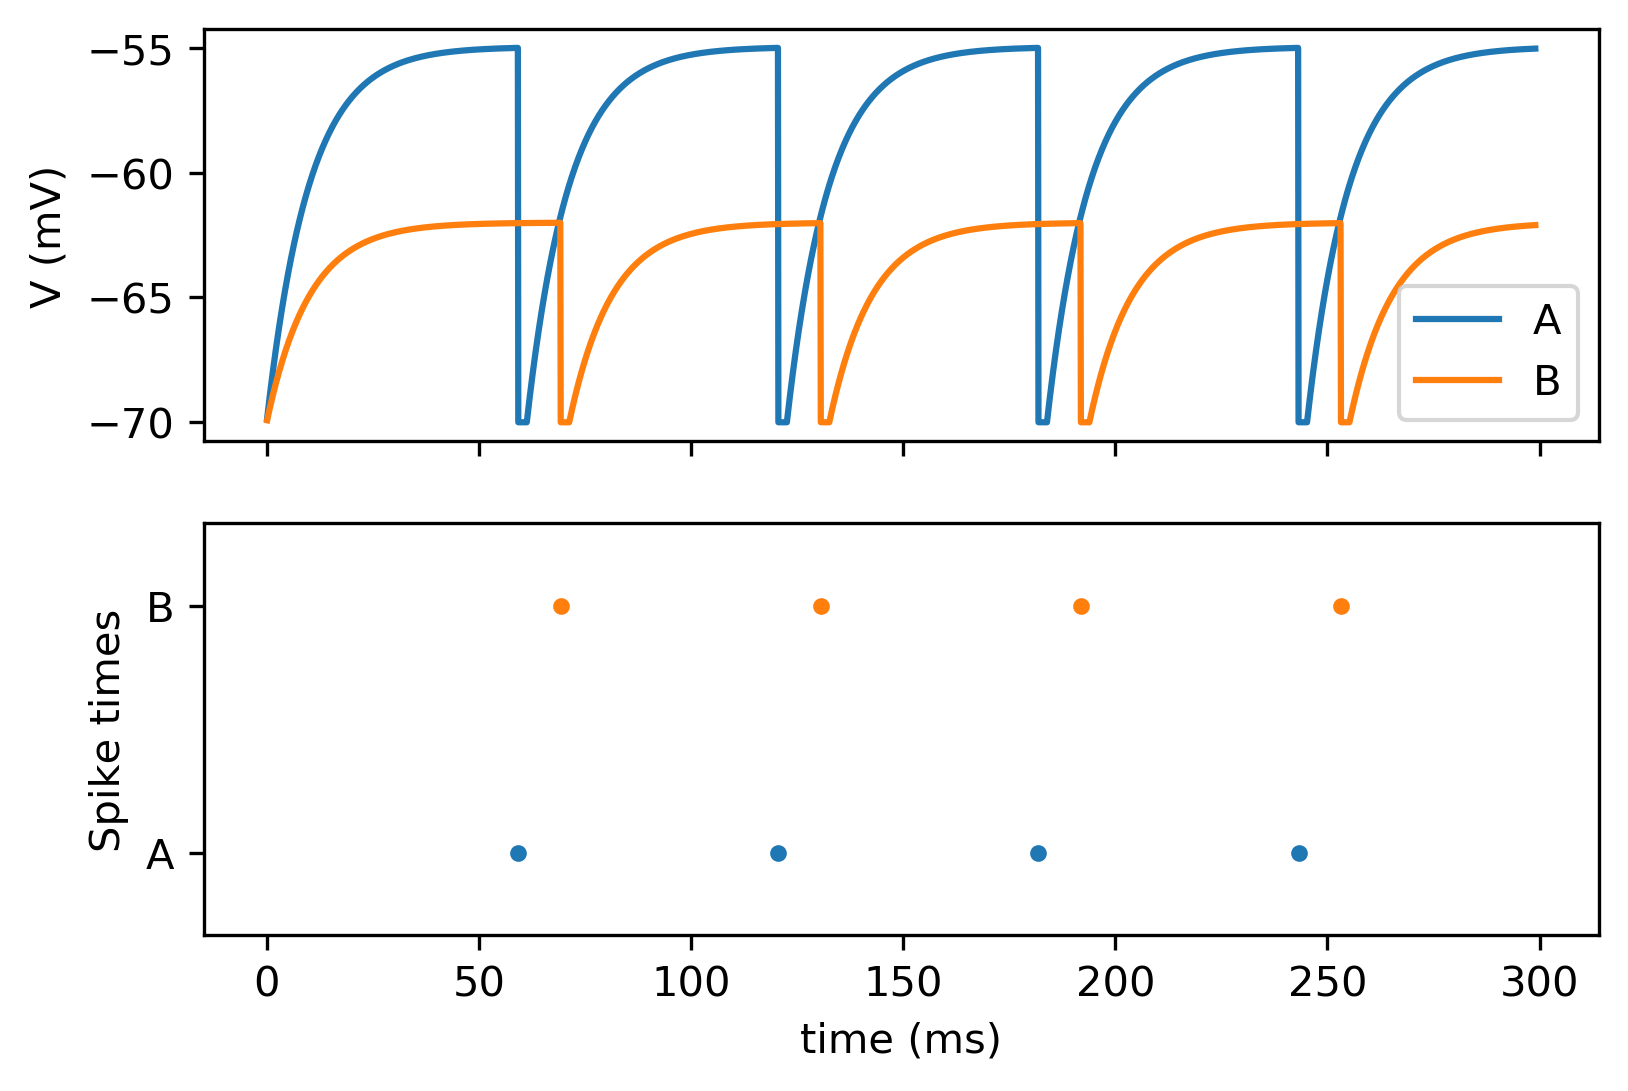

In [13]:
nest.ResetKernel()

neuron_A = nest.Create("iaf_psc_delta")
nest.SetStatus(neuron_A, {"I_e": 376.0})

multimeter_A = nest.Create("multimeter")
nest.SetStatus(multimeter_A, {"withtime": True, "record_from":["V_m"], "interval": 0.1})

spikedetector_A = nest.Create("spike_detector", params={"withgid": True, "withtime": True})

nest.Connect(multimeter_A, neuron_A)
nest.Connect(neuron_A, spikedetector_A)

neuron_B = nest.Create("iaf_psc_delta")
nest.SetStatus(neuron_B, {"I_e": 200.})

multimeter_B = nest.Create("multimeter")
nest.SetStatus(multimeter_B, {"withtime": True, "record_from":["V_m"], "interval": 0.1})

spikedetector_B = nest.Create("spike_detector", params={"withgid": True, "withtime": True})

nest.Connect(multimeter_B, neuron_B)
nest.Connect(neuron_B, spikedetector_B)

nest.Connect(neuron_A, neuron_B, syn_spec={"weight": 10., "delay": 10.})
nest.Simulate(300.0)

plot2neurons()

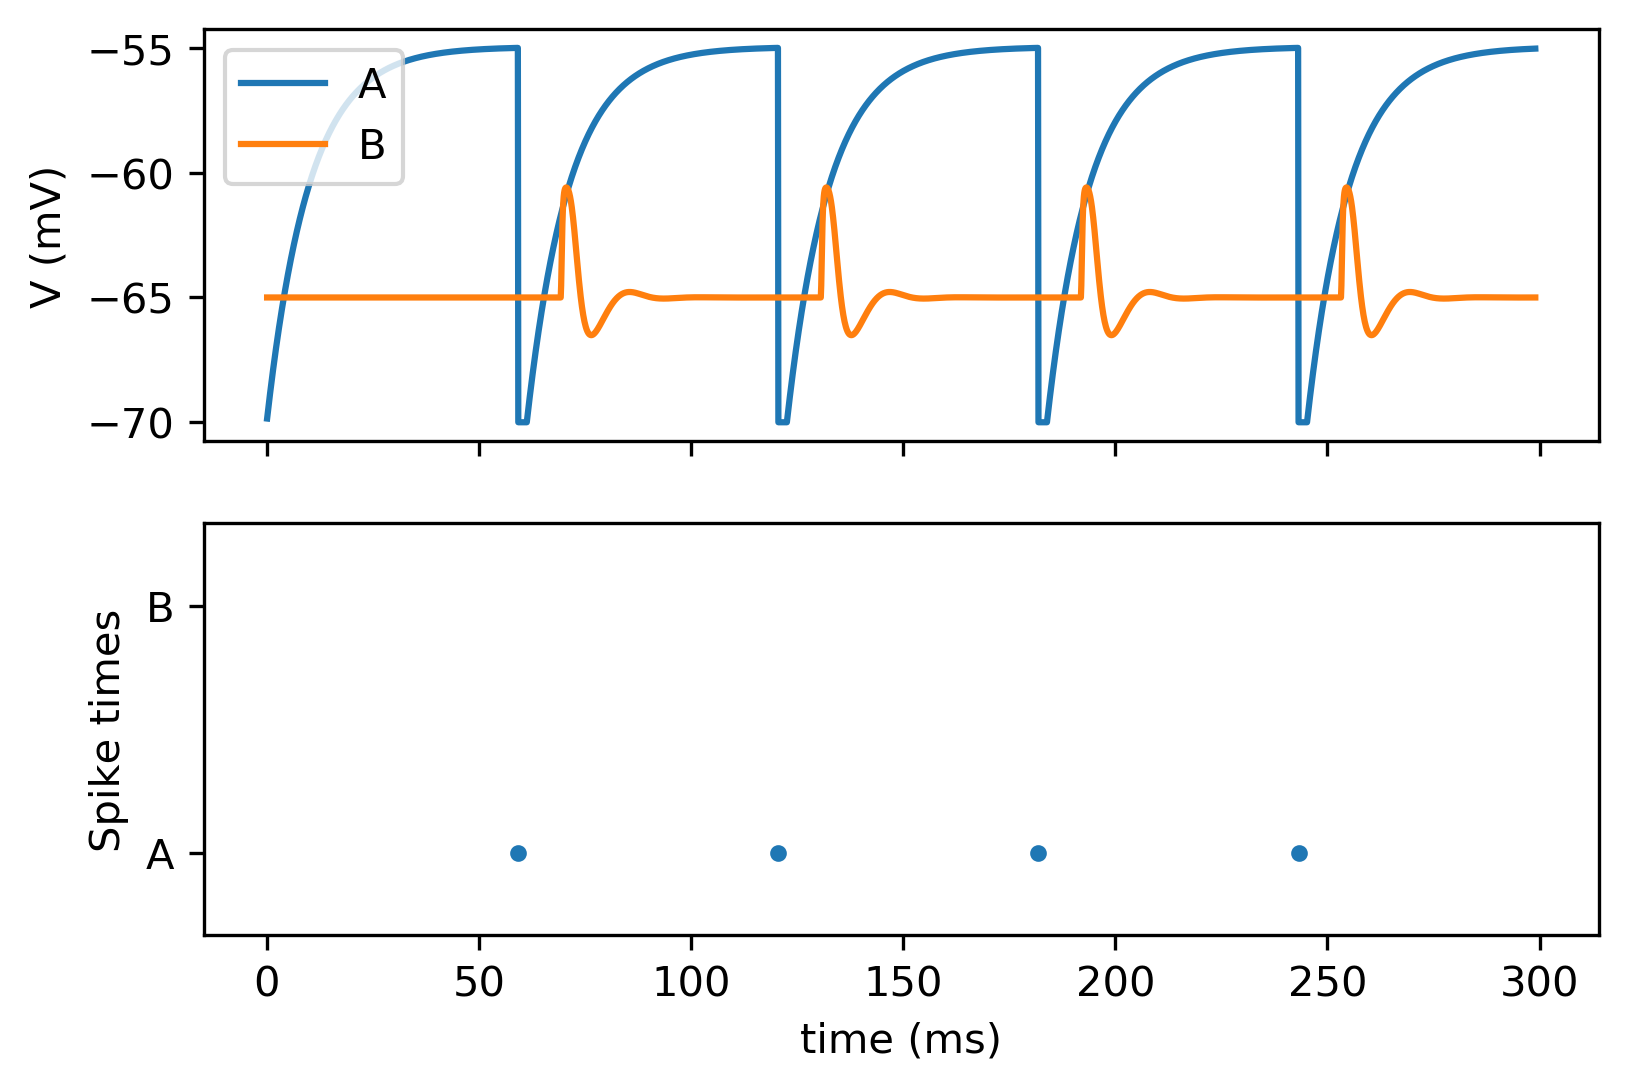

In [51]:
nest.ResetKernel()

neuron_A = nest.Create("iaf_psc_delta")
nest.SetStatus(neuron_A, {"I_e": 376.0})

multimeter_A = nest.Create("multimeter")
nest.SetStatus(multimeter_A, {"withtime": True, "record_from":["V_m"], "interval": 0.1})

spikedetector_A = nest.Create("spike_detector", params={"withgid": True, "withtime": True})

nest.Connect(multimeter_A, neuron_A)
nest.Connect(neuron_A, spikedetector_A)

neuron_B = nest.Create("hh_psc_alpha")
nest.SetStatus(neuron_B, {"I_e": 0.})

multimeter_B = nest.Create("multimeter")
nest.SetStatus(multimeter_B, {"withtime": True, "record_from":["V_m"], "interval": 0.1})

spikedetector_B = nest.Create("spike_detector", params={"withgid": True, "withtime": True})

nest.Connect(multimeter_B, neuron_B)
nest.Connect(neuron_B, spikedetector_B)

nest.Connect(neuron_A, neuron_B, syn_spec={"weight": 1000., "delay": 10.})
nest.Simulate(300.0)

plot2neurons()